In [1]:
import pandas as pd
import numpy as np

# Read in data

In [2]:
data=pd.read_csv("/Users/juileebhosale/Documents/Personal/JOB/Study/Okta Take_home Assignment/Okta_data.csv")

In [3]:
data.head()

,Deal ID,Year,Region,Sales Segment,Contract Length,Product Name,Quantity,List Price,Total List Price,ARR
0,00163VHH30WYN4JY,2022,AMER,C,36,Single Sign-On,2500,2,180000,41400
1,00163VHH30WYN4JY,2022,AMER,C,36,Adaptive Multi-factor Authentication,2500,6,540000,124200
2,004YLID3WUAUI08F,2022,AMER,A,12,Single Sign-On,1000,2,24000,16800
3,004YLID3WUAUI08F,2022,AMER,A,12,Universal Directory,1000,2,24000,16800
4,004YLID3WUAUI08F,2022,AMER,A,12,Lifecycle Management,1000,4,48000,33600


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39850 entries, 0 to 39849
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Deal ID           39850 non-null  object
 1   Year              39850 non-null  int64 
 2   Region            39850 non-null  object
 3   Sales Segment     39850 non-null  object
 4   Contract Length   39850 non-null  int64 
 5   Product Name      39850 non-null  object
 6   Quantity          39850 non-null  int64 
 7   List Price        39850 non-null  int64 
 8   Total List Price  39850 non-null  int64 
 9   ARR               39850 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 3.0+ MB


In [6]:
# Calculate discount metrics at the product line level
# ARR is annual, so we need to annualize Total List Price based on contract length

# Create annualized list price for comparison
data['Annualized_List_Price'] = (data['Total List Price'] / data['Contract Length']) * 12

# Calculate discount amount and percentage
data['Discount_Amount'] = data['Annualized_List_Price'] - data['ARR']
data['Discount_Percentage'] = (data['Discount_Amount'] / data['Annualized_List_Price']) * 100

# Check the calculations
data.head()

,Deal ID,Year,Region,Sales Segment,Contract Length,Product Name,Quantity,List Price,Total List Price,ARR,Annualized_List_Price,Discount_Amount,Discount_Percentage
0,00163VHH30WYN4JY,2022,AMER,C,36,Single Sign-On,2500,2,180000,41400,60000.0,18600.0,31.0
1,00163VHH30WYN4JY,2022,AMER,C,36,Adaptive Multi-factor Authentication,2500,6,540000,124200,180000.0,55800.0,31.0
2,004YLID3WUAUI08F,2022,AMER,A,12,Single Sign-On,1000,2,24000,16800,24000.0,7200.0,30.0
3,004YLID3WUAUI08F,2022,AMER,A,12,Universal Directory,1000,2,24000,16800,24000.0,7200.0,30.0
4,004YLID3WUAUI08F,2022,AMER,A,12,Lifecycle Management,1000,4,48000,33600,48000.0,14400.0,30.0


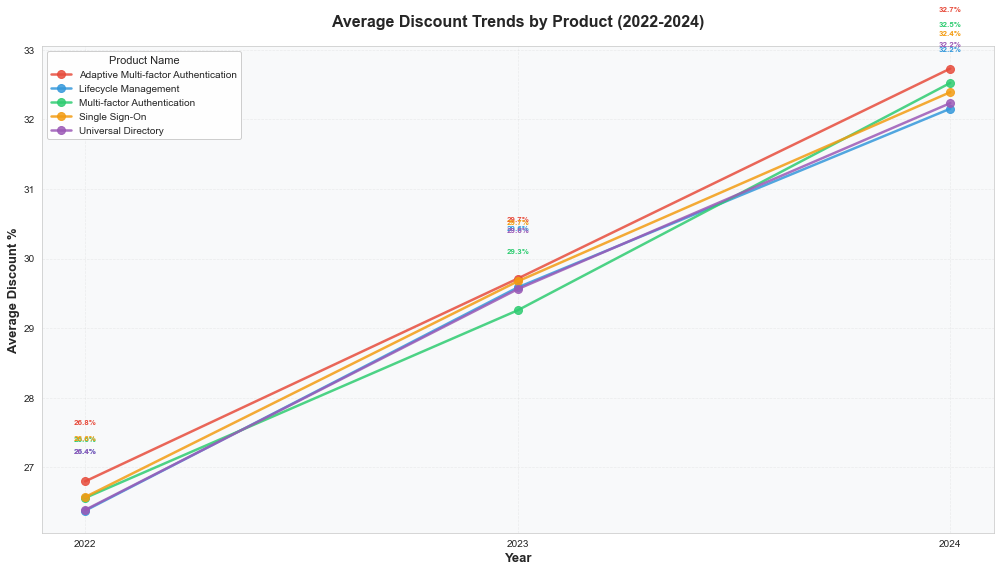


Average Discount % by Product and Year:
Year                                   2022   2023   2024
Product Name                                             
Adaptive Multi-factor Authentication  26.80  29.71  32.73
Lifecycle Management                  26.38  29.59  32.15
Multi-factor Authentication           26.56  29.26  32.52
Single Sign-On                        26.58  29.67  32.39
Universal Directory                   26.39  29.56  32.23


Change from 2022 to 2024 (percentage points):
Product Name
Multi-factor Authentication             5.96
Adaptive Multi-factor Authentication    5.93
Universal Directory                     5.84
Single Sign-On                          5.81
Lifecycle Management                    5.77
dtype: float64


In [12]:
# Analyze discount trends by product over the 3 years
product_year_discounts = data.groupby(['Product Name', 'Year'])['Discount_Percentage'].mean().reset_index()

# Create a beautiful line chart
fig, ax = plt.subplots(figsize=(14, 8))

# Define a color palette for products
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6', 
          '#1abc9c', '#e67e22', '#34495e', '#16a085', '#d35400']

# Plot each product as a separate line
for i, product in enumerate(product_year_discounts['Product Name'].unique()):
    product_data = product_year_discounts[product_year_discounts['Product Name'] == product]
    ax.plot(product_data['Year'], product_data['Discount_Percentage'], 
            marker='o', linewidth=2.5, markersize=8, 
            label=product, color=colors[i % len(colors)], alpha=0.85)
    
    # Add value labels at each point
    for x, y in zip(product_data['Year'], product_data['Discount_Percentage']):
        ax.text(x, y + 0.8, f'{y:.1f}%', ha='center', va='bottom', 
                fontsize=8, fontweight='bold', color=colors[i % len(colors)])

# Styling
ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Average Discount %', fontsize=13, fontweight='bold')
ax.set_title('Average Discount Trends by Product (2022-2024)', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(product_year_discounts['Year'].unique())
ax.legend(title='Product Name', fontsize=10, title_fontsize=11, loc='best', framealpha=0.95)
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

# Add background color
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()

# Print summary table
print("\nAverage Discount % by Product and Year:")
product_year_pivot = product_year_discounts.pivot(index='Product Name', columns='Year', values='Discount_Percentage')
print(product_year_pivot.round(2))
print(f"\n\nChange from 2022 to 2024 (percentage points):")
change = product_year_pivot[2024] - product_year_pivot[2022]
print(change.round(2).sort_values(ascending=False))


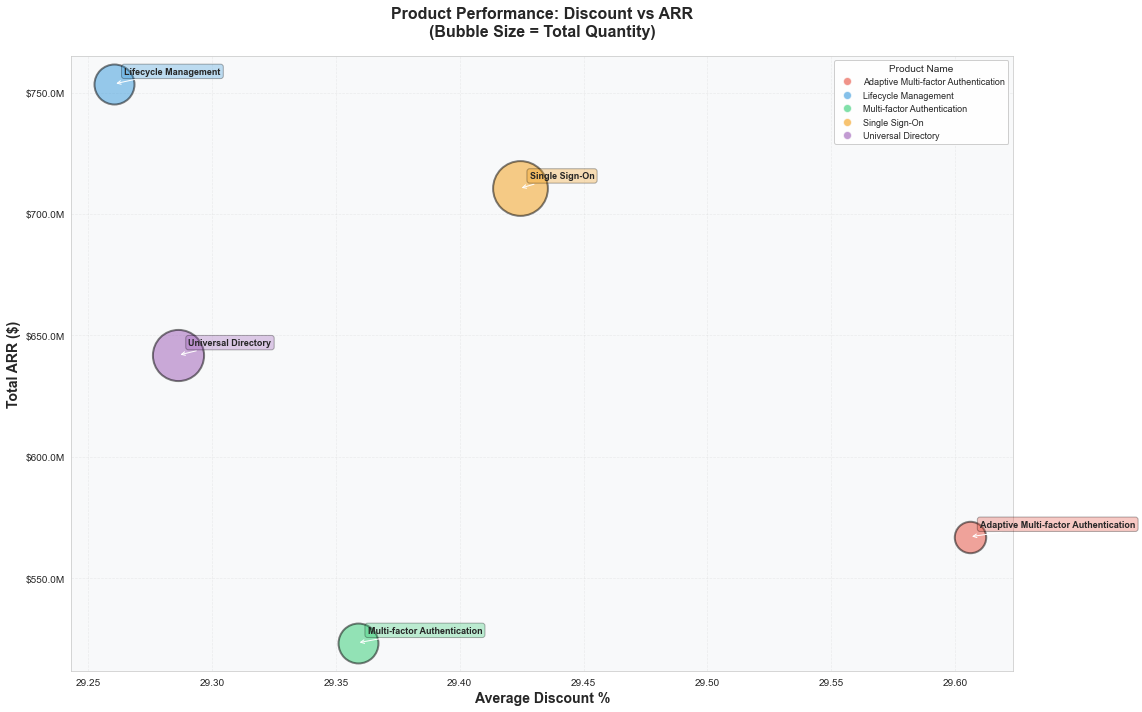


Bubble Chart Data Summary:
                           Product Name  Discount_Percentage        ARR  \
1                  Lifecycle Management                29.26  753584880   
3                        Single Sign-On                29.42  710521560   
4                   Universal Directory                29.29  641870880   
0  Adaptive Multi-factor Authentication                29.61  567075960   
2           Multi-factor Authentication                29.36  523379700   

    Quantity  
1   61226000  
3  122521000  
4  105819000  
0   34459500  
2   60903000  


In [17]:
# Prepare data for bubble chart
bubble_data = data.groupby('Product Name').agg({
    'Discount_Percentage': 'mean',
    'ARR': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Create bubble chart
fig, ax = plt.subplots(figsize=(16, 10))

# Define color palette for products
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6', 
          '#1abc9c', '#e67e22', '#95a5a6', '#16a085', '#d35400']

# Normalize bubble sizes to reasonable range (adjust the divisor for better sizing)
max_quantity = bubble_data['Quantity'].max()
min_size = 200
max_size = 3000

# Create scatter plot (bubble chart)
for i, product in enumerate(bubble_data['Product Name']):
    product_row = bubble_data[bubble_data['Product Name'] == product]
    
    # Normalize bubble size
    normalized_size = min_size + (product_row['Quantity'].values[0] / max_quantity) * (max_size - min_size)
    
    ax.scatter(product_row['Discount_Percentage'], 
               product_row['ARR'], 
               s=normalized_size,
               color=colors[i % len(colors)], 
               alpha=0.5, 
               edgecolors='black', 
               linewidth=2,
               label=product)

# Add product name labels with better positioning
for i, row in bubble_data.iterrows():
    ax.annotate(row['Product Name'], 
                xy=(row['Discount_Percentage'], row['ARR']),
                xytext=(10, 10), 
                textcoords='offset points',
                fontsize=9, 
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor=colors[i % len(colors)], alpha=0.3, edgecolor='black'),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=1))

# Styling
ax.set_xlabel('Average Discount %', fontsize=14, fontweight='bold')
ax.set_ylabel('Total ARR ($)', fontsize=14, fontweight='bold')
ax.set_title('Product Performance: Discount vs ARR\n(Bubble Size = Total Quantity)', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

# Format Y-axis as currency
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Add background color
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# Add legend with bubble size reference
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=product,
                         markerfacecolor=colors[i % len(colors)], markersize=8, alpha=0.6)
                  for i, product in enumerate(bubble_data['Product Name'])]
ax.legend(handles=legend_elements, title='Product Name', fontsize=9, 
          title_fontsize=10, loc='upper right', framealpha=0.95)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nBubble Chart Data Summary:")
print(bubble_data.sort_values('ARR', ascending=False).round(2))


In [9]:
# Analyze discounts by product
product_discounts = data.groupby('Product Name').agg({
    'Discount_Percentage': ['mean', 'median', 'count'],
    'Deal ID': 'nunique'
}).round(2)

product_discounts.columns = ['Mean_Discount_%', 'Median_Discount_%', 'Num_Transactions', 'Num_Deals']
product_discounts = product_discounts.sort_values('Mean_Discount_%', ascending=False)

print("Discount by Product (Ranked by Average Discount):")
print(product_discounts)

Discount by Product (Ranked by Average Discount):
                                      Mean_Discount_%  Median_Discount_%  \
Product Name                                                               
Adaptive Multi-factor Authentication            29.61               27.0   
Single Sign-On                                  29.42               27.0   
Multi-factor Authentication                     29.36               27.0   
Universal Directory                             29.29               27.0   
Lifecycle Management                            29.26               27.0   

                                      Num_Transactions  Num_Deals  
Product Name                                                       
Adaptive Multi-factor Authentication              3298       3298  
Single Sign-On                                   12353      12353  
Multi-factor Authentication                       6102       6102  
Universal Directory                              11346      11346  
Lifecycle

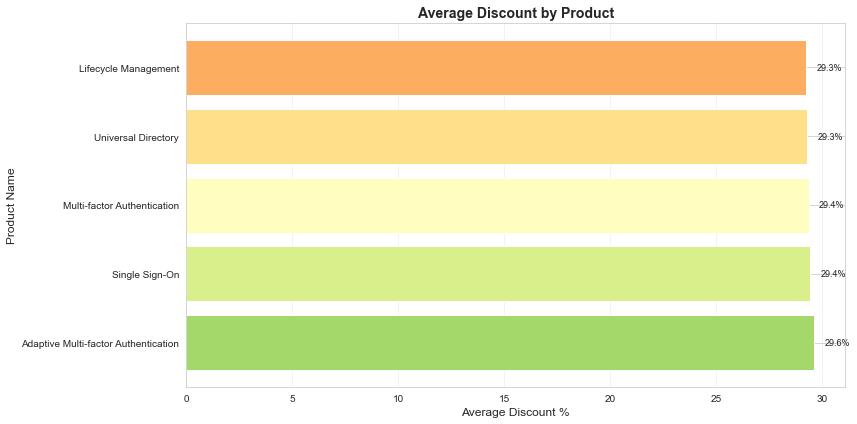

In [10]:
# Visualize product discounts
plt.figure(figsize=(12, 6))
colors = plt.cm.RdYlGn_r(np.linspace(0.3, 0.7, len(product_discounts)))
bars = plt.barh(product_discounts.index, product_discounts['Mean_Discount_%'], color=colors)
plt.xlabel('Average Discount %', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.title('Average Discount by Product', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', 
             ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()